In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('drug200.csv')

In [37]:
df.head(
)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [38]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [39]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [40]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [41]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [42]:
drug_mapping = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'DrugY': 4}
df['Drug'] = df['Drug'].map(drug_mapping)


In [43]:
sex_mapping = {'F' : 0,'M' : 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [44]:
BP_mapping = {'HIGH' : 2,'LOW' : 0, 'NORMAL': 1 }
df.BP = df.BP.map(BP_mapping)


In [45]:
chol_mapping = {'HIGH': 1, 'NORMAL' : 0}
df.Cholesterol = df.Cholesterol.map(chol_mapping)

In [46]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


(array([23., 16., 16., 54., 91.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

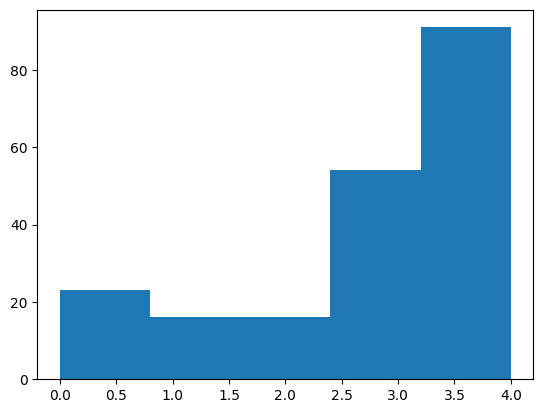

In [47]:
plt.hist(df['Drug'], bins = 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [49]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K',]]
y = df['Drug']

In [50]:
from sklearn import preprocessing

In [51]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
model = KNeighborsClassifier(n_neighbors = 2).fit(x_train,y_train)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
y_predict = model.predict(x_test)

In [65]:
accuracy_score(y_test,y_predict)

0.85

In [73]:
i = 1
a = []
while i < 50:
    model = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_predict = model.predict(x_test)
    a.append(accuracy_score(y_test,y_predict))
    i+=1


In [74]:
neighbors = np.arange(1,50)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [75]:
data = {'neighbors': neighbors,'accuracy': a}

In [76]:
data= pd.DataFrame(data)

In [77]:
data.head()

,neighbors,accuracy
0,1,0.975
1,2,0.925
2,3,0.950
3,4,0.850
4,5,0.850


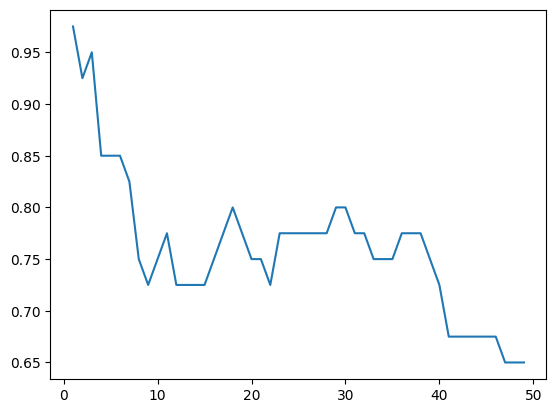

In [78]:
plt.plot(data.neighbors,data.accuracy)
plt.show()

In [99]:
predicted = model.predict([[28,0,1,1,7]])
predicted

array([4], dtype=int64)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB
